In [24]:
from sklearn.datasets import load_boston
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# 1. 데이터 
datasets = load_boston()

x = datasets.data
y = datasets.target

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [26]:
# 2. train ,test 분리

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [27]:
# 3. 모델구성

model = Sequential(
    [
    # input_dim 은 행과 열만 앞으로 다차원이 나오면 input_shape 로 합니다
    # ex (100,10,5 ) 의 input_shape = (10,5)
    Dense(10,input_shape=(13,),activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(10 ,activation="relu"),
    Dense(1)
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                140       
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
 dense_30 (Dense)            (None, 10)               

In [28]:
# 3.모델 컴파일
from tensorflow.keras.callbacks import EarlyStopping
# 모니터 : val_loss 를 관찰
# mode : 값이 커질때 멈춤 , 값이 작아져야함
# patience : 개선이 안된다고 바로 종료시키지 않고 에폭을 기다림
# 
earlyStopping = EarlyStopping(monitor="val_loss",
                              mode="min",patience =10,
                              restore_best_weights=True,
                              verbose=1
                              
                              )

model.compile(loss="mse",optimizer="adam",metrics=['accuracy'])

# model.fit 이 반환한 기록을 저장
hist = model.fit(
                x_train,
                y_train,
                epochs=10,
                batch_size=3,
                validation_split=0.2,
                verbose=1,
                callbacks = [earlyStopping]
                )


Epoch 1/10
108/108 [==============================] - 1s 5ms/step - loss: 301.6542 - accuracy: 0.0000e+00 - val_loss: 124.8593 - val_accuracy: 0.0000e+00
Epoch 2/10
108/108 [==============================] - 0s 4ms/step - loss: 101.0294 - accuracy: 0.0000e+00 - val_loss: 115.9679 - val_accuracy: 0.0000e+00
Epoch 3/10
108/108 [==============================] - 0s 4ms/step - loss: 72.5731 - accuracy: 0.0000e+00 - val_loss: 69.2636 - val_accuracy: 0.0000e+00
Epoch 4/10
108/108 [==============================] - 0s 4ms/step - loss: 62.9510 - accuracy: 0.0000e+00 - val_loss: 64.4913 - val_accuracy: 0.0000e+00
Epoch 5/10
108/108 [==============================] - 0s 4ms/step - loss: 63.0042 - accuracy: 0.0000e+00 - val_loss: 61.1372 - val_accuracy: 0.0000e+00
Epoch 6/10
108/108 [==============================] - 0s 4ms/step - loss: 58.9487 - accuracy: 0.0000e+00 - val_loss: 64.0112 - val_accuracy: 0.0000e+00
Epoch 7/10
108/108 [==============================] - 0s 3ms/step - loss: 57.6568 - 

In [29]:
# 평가 예측
loss = model.evaluate(x_test,y_test)

print("loss : ",loss)

4/4 [==============================] - 0s 2ms/step - loss: 70.6777 - accuracy: 0.0000e+00
loss :  [70.67774200439453, 0.0]


In [30]:
# hist.history 는 딕셔너리형으로 구성

print(hist.history['loss'])
print("=============================================================")
print(hist.history['val_loss'])


[301.65423583984375, 101.0293960571289, 72.5730972290039, 62.95097351074219, 63.00423812866211, 58.948692321777344, 57.65681076049805, 56.00062942504883, 56.045013427734375, 55.045841217041016]
[124.8592529296875, 115.96785736083984, 69.26363372802734, 64.49125671386719, 61.1372184753418, 64.01116943359375, 62.70305252075195, 57.602020263671875, 58.91183090209961, 54.820613861083984]


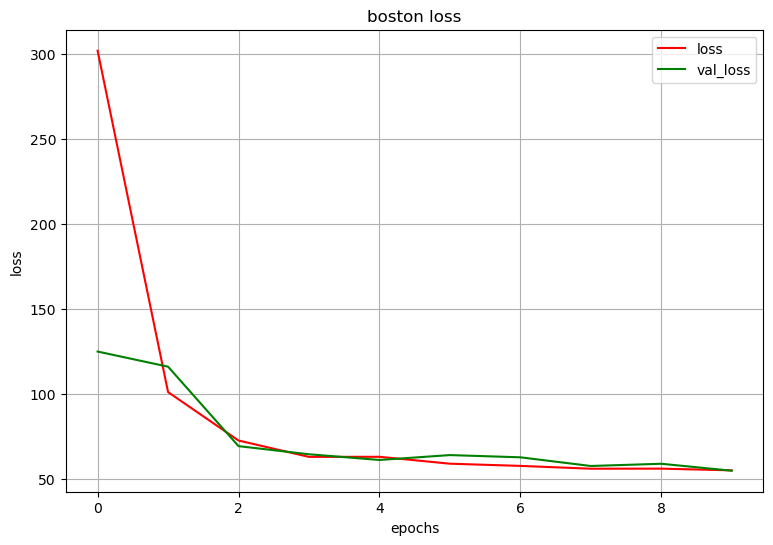

In [31]:
# 시각화
import matplotlib.pyplot as plt

# 필롯의 사이즈
plt.figure(figsize =(9,6))

plt.plot(hist.history["loss"],c ="red",label="loss")
plt.plot(hist.history["val_loss"],c="green",label="val_loss")
plt.grid() # 격자 표시
plt.xlabel("epochs") # x 라벨 표시 
plt.ylabel("loss") # y 라벨 표시
plt.title("boston loss") # 그래프의 타이틀 표시
plt.legend(loc = "upper right") # 그래프의 범주 표시
plt.show() # 그래프를 보여줘